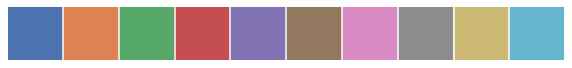

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

from matplotlib.ticker import MultipleLocator

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox.expanded(1.05,1.4))
    
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [205]:
labels = ['B-ResNet', 'B-DenseNet', 'MSDNet']
models = ['b-resnet', 'b-densenet', 'msdnet']
results = {
    'b-resnet' : pd.read_json('nuc_2_jetson_b-resnet_analysis2.json'),
    'b-densenet' : pd.read_json('nuc_2_jetson_b-densenet_analysis2.json'),
    'msdnet' : pd.read_json('msdnet-local3_analysis2.json')
}

methods = ['latest', 'confidence (add)', 'confidence (max)', 'score-margin (max)', 'confidence (add,weighted)',  
           'score_margin (add)' , 'score-margin (add,weighted)']

results['b-resnet'][10:50]

,Delay Threshold,Exit,N,confidence (add),"confidence (add,weighted)",confidence (max),latest,missed,score-margin (max)
10,75.0,[],5000,0.1508,0.1526,0.1530,0.1540,4066,0.1446
11,77.5,[],5000,0.3294,0.3336,0.3356,0.3386,2996,0.3180
12,80.0,[],5000,0.5072,0.5134,0.5174,0.5206,1964,0.4878
13,82.5,[],5000,0.6540,0.6632,0.6672,0.6716,1131,0.6278
14,85.0,[],5000,0.7482,0.7584,0.7636,0.7680,597,0.7176
15,87.5,[1.0],5000,0.7964,0.8042,0.8094,0.8136,334,0.7598
16,90.0,"[0.0, 0.0, 1.0]",5000,0.8270,0.8336,0.8346,0.8402,213,0.7842
17,92.5,"[0.0, 0.0, 1.0]",5000,0.8476,0.8524,0.8520,0.8552,148,0.7984
18,95.0,"[0.0, 0.0, 1.0]",5000,0.8546,0.8578,0.8578,0.8610,120,0.8036
19,97.5,"[0.0, 0.0, 1.0]",5000,0.8598,0.8624,0.8616,0.8648,98,0.8068


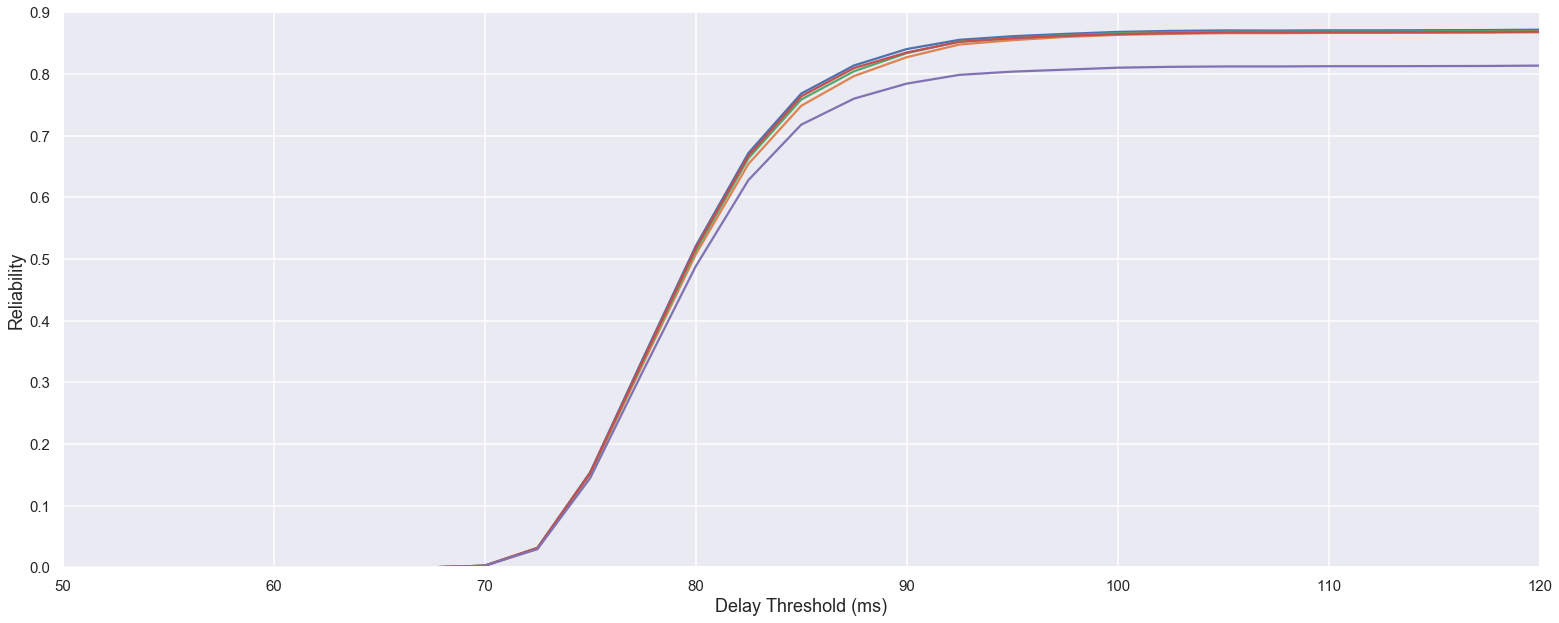

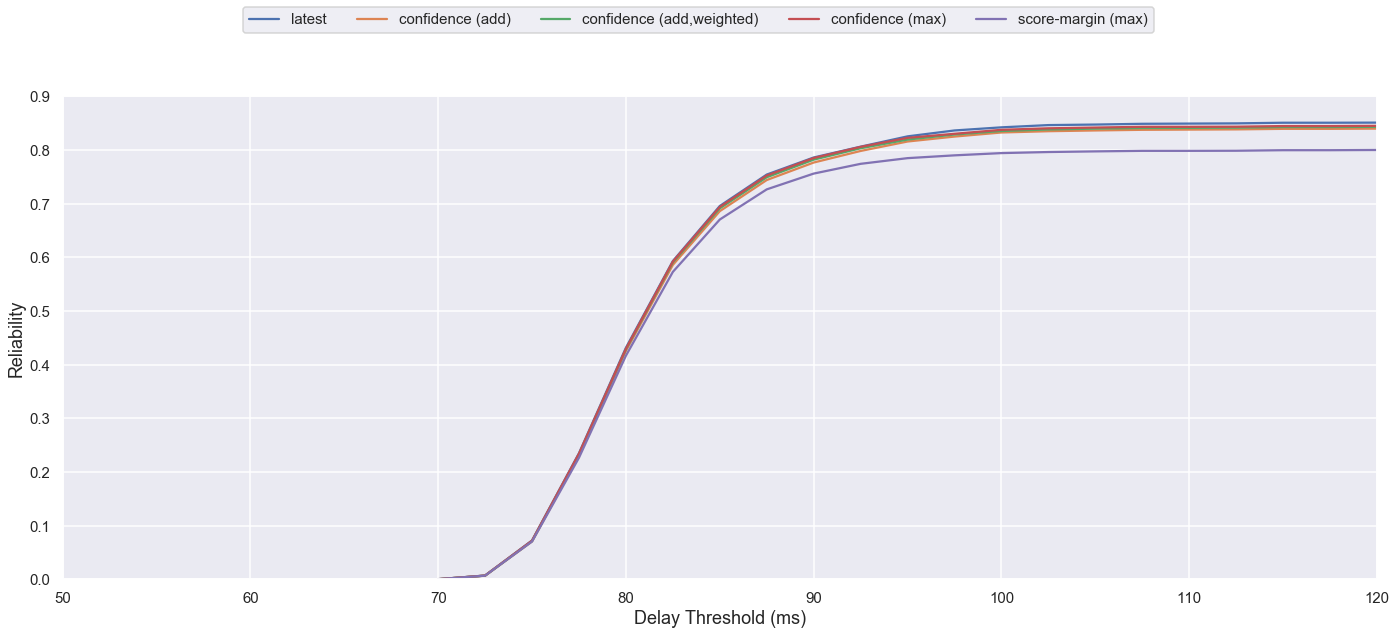

In [192]:
for net in models[:2]:
    fig, axes = plt.subplots(1,1, figsize=(22,9))
    for method in methods[:5]:
        axes.plot(results[net]['Delay Threshold'], results[net][method])
    axes.set_ylim([0,0.90])
    axes.set_xlim([50,120])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Reliability')
    
    fig.tight_layout()


    plt.savefig(net + '_information-combination.png')

fig.subplots_adjust(top=0.85, left=0.15)
legend = fig.legend(methods, ncol=5, 
               loc="upper center", fontsize='small')
export_legend(legend, 'combinations_legend.png')

KeyError: 'confidence (add)'

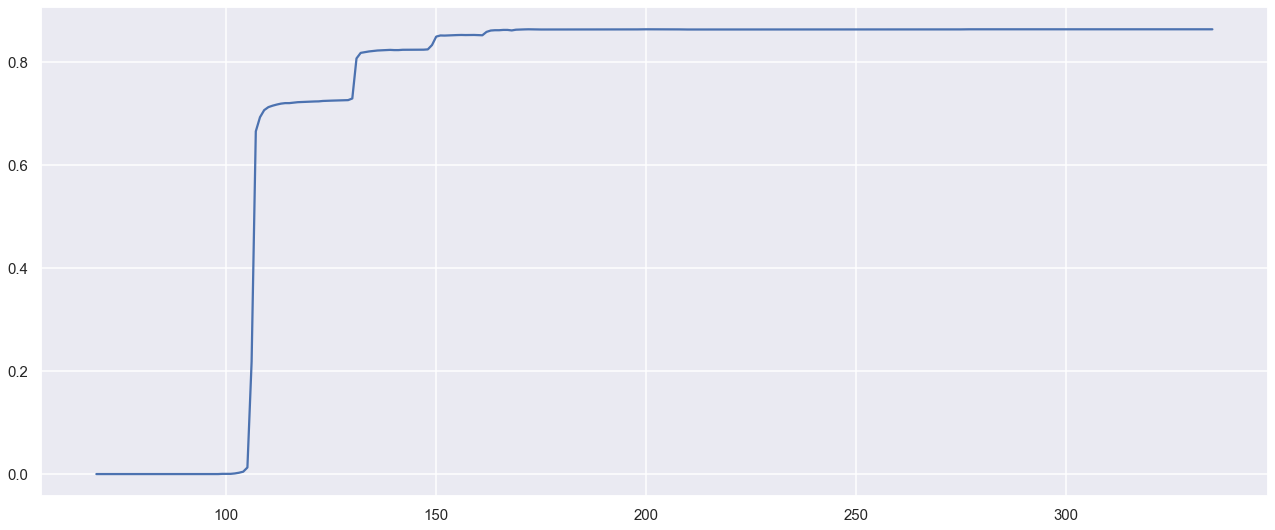

In [193]:
for net in models[2:]:
    fig, axes = plt.subplots(1,1, figsize=(22,9))
    for method in methods[:5]:
        axes.plot(results[net]['Delay Threshold']+66, results[net][method])
    axes.set_ylim([0,0.90])
    axes.set_xlim([50,120])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Reliability')
    
    fig.tight_layout()


    plt.savefig(net + '_information-combination.png')

fig.subplots_adjust(top=0.85, left=0.15)
legend = fig.legend(methods, ncol=5, 
               loc="upper center", fontsize='small')
export_legend(legend, 'combinations_legend.png')

-174


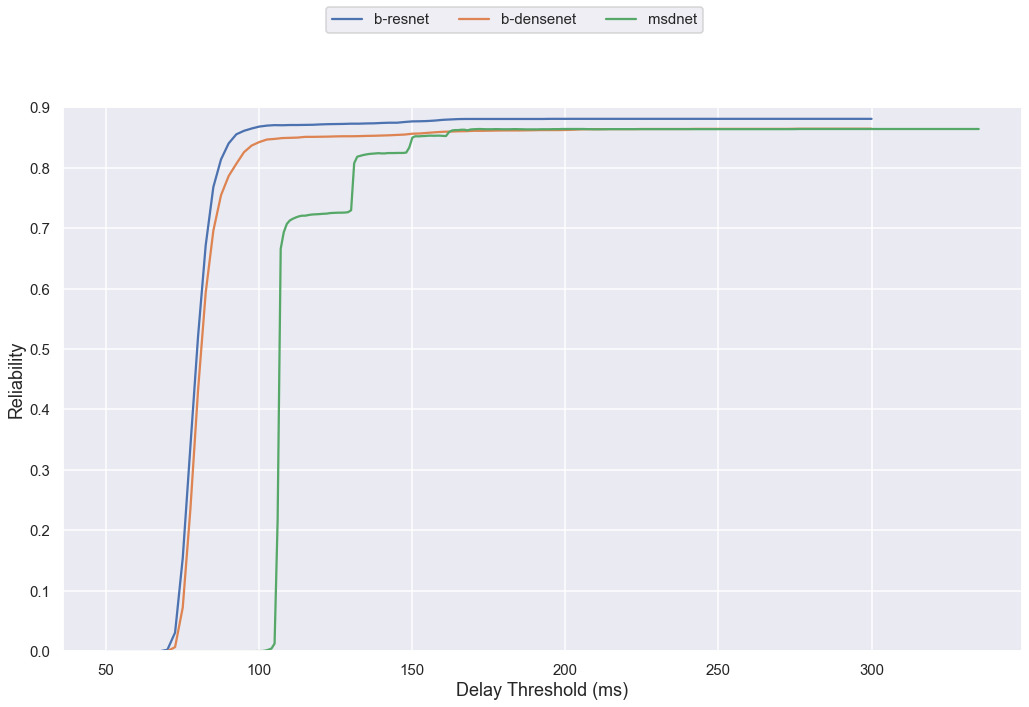

In [197]:
fig, axes = plt.subplots(1,1, figsize=(16,10))
for net in results:
    
    if not net == 'msdnet':
        axes.plot(results[net]['Delay Threshold'], results[net]['latest'])
        tot_len = len(results[net]['Delay Threshold'])
    else:
        acc = results[net]['latest'].max()
        t = results[net]['Delay Threshold'].max()
        mis_len = tot_len - len(results[net]['latest'])
        print(mis_len)
        #axes.plot(np.append(np.array(results[net]['Delay Threshold']+66.5),[69+t+(2.5*x) for x in range(mis_len)]), np.append(np.array(results[net]['latest']),np.ones(81)*acc))
        axes.plot(results[net]['Delay Threshold']+66, results[net]['latest'])
    axes.set_ylim([0.0,0.90])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Reliability')
    plt.savefig(net + '_information-combination-comparison.png')
    fig.tight_layout()
fig.subplots_adjust(top=0.85, left=0.15)
fig.legend(results, ncol=5, 
               loc="upper center", fontsize='small')    

In [189]:
np.append(np.array(results[net]['Delay Threshold']+66.5),[69+t+(2.5*x) for x in range(mis_len)])

array([ 66.5,  69. ,  71.5,  74. ,  76.5,  79. ,  81.5,  84. ,  86.5,
        89. ,  91.5,  94. ,  96.5,  99. , 101.5, 104. , 106.5, 109. ,
       111.5, 114. , 116.5, 119. , 121.5, 124. , 126.5, 129. , 131.5,
       134. , 136.5, 139. , 141.5, 144. , 146.5, 149. , 151.5, 154. ,
       156.5, 159. , 161.5, 164. , 166.5, 169. , 171.5, 174. , 176.5,
       179. , 181.5, 184. , 186.5, 189. , 191.5, 194. , 196.5, 199. ,
       201.5, 204. , 206.5, 209. , 211.5, 214. , 216.5, 219. , 221.5,
       224. , 226.5, 229. , 231.5, 234. , 236.5, 239. , 241.5, 244. ,
       246.5, 249. , 251.5, 254. , 256.5, 259. , 261.5, 264. , 266.5,
       269. , 271.5, 274. , 276.5, 279. , 281.5, 284. , 286.5, 289. ,
       291.5, 294. , 296.5])

In [179]:
[66.5+t+(2.5*x) for x in range(mis_len)]

[94.0,
 96.5,
 99.0,
 101.5,
 104.0,
 106.5,
 109.0,
 111.5,
 114.0,
 116.5,
 119.0,
 121.5,
 124.0,
 126.5,
 129.0,
 131.5,
 134.0,
 136.5,
 139.0,
 141.5,
 144.0,
 146.5,
 149.0,
 151.5,
 154.0,
 156.5,
 159.0,
 161.5,
 164.0,
 166.5,
 169.0,
 171.5,
 174.0,
 176.5,
 179.0,
 181.5,
 184.0,
 186.5,
 189.0,
 191.5,
 194.0,
 196.5,
 199.0,
 201.5,
 204.0,
 206.5,
 209.0,
 211.5,
 214.0,
 216.5,
 219.0,
 221.5,
 224.0,
 226.5,
 229.0,
 231.5,
 234.0,
 236.5,
 239.0,
 241.5,
 244.0,
 246.5,
 249.0,
 251.5,
 254.0,
 256.5,
 259.0,
 261.5,
 264.0,
 266.5,
 269.0,
 271.5,
 274.0,
 276.5,
 279.0,
 281.5,
 284.0,
 286.5,
 289.0,
 291.5,
 294.0]

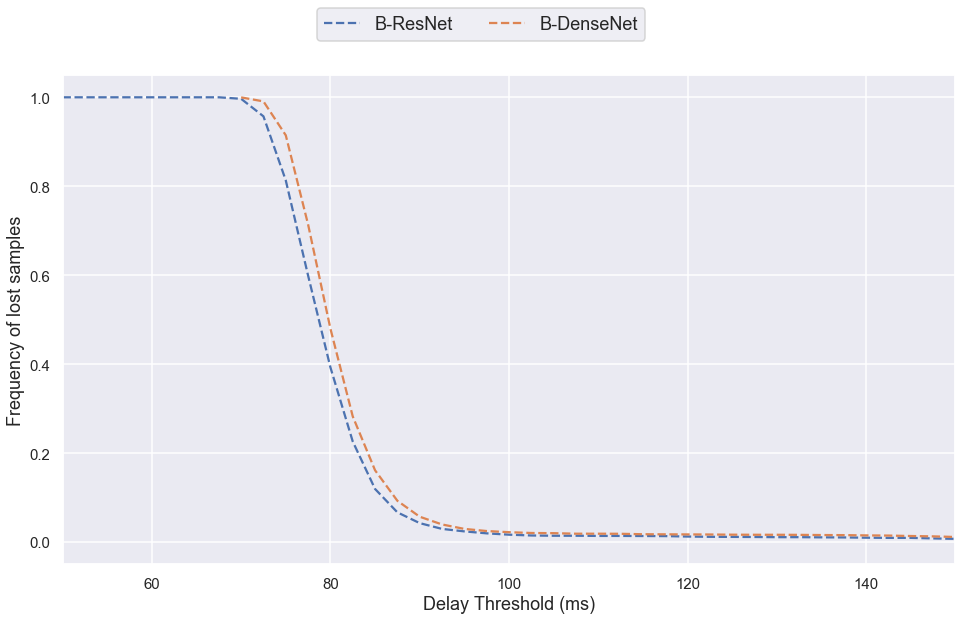

In [156]:
fig, axes = plt.subplots(1,1)
for net in results:

    #print(results[net]['missed'])
    #ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
    axes.plot(results[net]['Delay Threshold'], results[net]['missed'] / 5000, '--')
    #axes.axvline(x=75, ymin=0, ymax=1)
    axes.set_xlim([50,150])
    #axes.set_ylim([-0.05,1.05])
    axes.set(xlabel='Delay Threshold (ms)', ylabel='Frequency of lost samples')

    #print(np.array(results[net]['Exit'].tolist()))
    
    #for s in results[net]['Exit'].tolist():
    #    print(np.array(s))

    #ax2.plot(results[net]['Delay Threshold'], exits[:,0].T/5000,  color=current_palette[1])
    #ax2.plot(results[net]['Delay Threshold'], exits[:,1]/5000,  color=current_palette[2])
    #ax2.plot(results[net]['Delay Threshold'], exits[:,2]/5000,  color=current_palette[3])
    #ax2.plot(results[net]['Delay Threshold'], exits[:,3]/5000,  color=current_palette[4])


    ax2.set(ylabel='Arrived at exit frequency')


fig.legend(['{}'.format(x) for x in labels[:2]], ncol=5, loc="upper center", fontsize='medium')
plt.savefig(net + '_exit-reached.png')

IndexError: too many indices for array

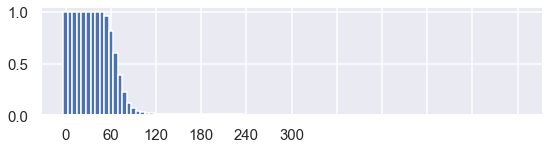

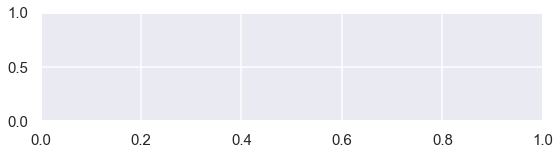

In [99]:
width=1
for net in results:
    exits = np.array(results[net]['Exit'].tolist())
    
    fig, axes = plt.subplots(1, sharex=True, figsize=(9,2))
    axes.bar(np.arange(len(results[net]['Delay Threshold'])), results[net]['missed']/5000,  color=current_palette[0], width=width)
    
    axes.set_xticks(np.arange(0,len(results[net]['Delay Threshold'])+5,10))
    axes.set_xticklabels(np.arange(0,301,60))
    
    for exit in range(4):
        fig, axes = plt.subplots(1, sharex=True, figsize=(9,2))

        width=1

        results[net] = results[net].dropna()

        axes.bar(np.arange(len(results[net]['Delay Threshold'])), exits[:,exit]/5000,  color=current_palette[exit+1], width=width)

        fig.tight_layout()


        
        axes.set_xticks(np.arange(0,len(results[net]['Delay Threshold'])+5,10))
        axes.set_xticklabels(np.arange(0,301,60))

        #fig.legend(['Lost'] + ['Exit.{}'.format(n) for n in range(4)], ncol=5, loc="upper center", fontsize='medium')

        fig.tight_layout()
        fig.subplots_adjust(top=0.90)

    

In [11]:
np.arange(0,len(results[net]['Delay Threshold'])+5,10)

array([ 0, 10, 20, 30, 40, 50])

In [12]:
np.arange(len(results[net]['Delay Threshold']))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [13]:
np.array(results[net]['Delay Threshold'])

array([ 70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195,
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300], dtype=int64)

In [14]:
np.array(results[net]['missed'])

array([4999., 4573., 2400.,  807.,  285.,  148.,  111.,  100.,   94.,
         88.,   86.,   83.,   82.,   79.,   75.,   68.,   57.,   48.,
         39.,   34.,   29.,   28.,   26.,   26.,   24.,   23.,   21.,
         16.,   14.,   13.,   13.,   12.,   12.,   12.,   11.,   10.,
         10.,   10.,   10.,   10.,   10.,    9.,    9.,    9.,    9.,
          9.,    9.])

In [53]:
lp = {
    'b-resnet' : pd.read_json('nuc_2_jetson_b-resnet_lost_prediction_analysis.json'),
    'b-densenet' : pd.read_json('nuc_2_jetson_b-densenet_lost_prediction_analysis.json'),
    'msdnet' : pd.read_json('msdnet-local3_lost_prediction_analysis.json')
}

In [54]:
lp['b-resnet']

,N Exits,confidence (add),"confidence (add,weighted)",confidence (max),latest,"score-margin (add,weighted)",score-margin (max),score_margin (add)
0,5000,0.4394,0.4394,0.4394,0.4394,0.4394,0.4394,0.4394
1,5000,0.6412,0.6594,0.6496,0.6684,0.6488,0.6374,0.6374
2,5000,0.8470,0.8726,0.8656,0.8698,0.8650,0.8158,0.8508
3,5000,0.8782,0.8796,0.8794,0.8826,0.8796,0.8232,0.8768


In [55]:
lp['msdnet']

,N Exits,latest,confidence (max),confidence (add),"confidence (add,weighted)",score-margin (max),score_margin (add),"score-margin (add,weighted)"
0,5000,0.7256,0.7256,0.7256,0.7256,0.7256,0.7256,0.7256
1,5000,0.8248,0.8100,0.8124,0.8150,0.8104,0.8104,0.8124
2,5000,0.8530,0.8432,0.8456,0.8502,0.8280,0.8452,0.8484
3,5000,0.8644,0.8550,0.8606,0.8630,0.8312,0.8588,0.8610
4,5000,0.8640,0.8598,0.8658,0.8674,0.8322,0.8646,0.8664


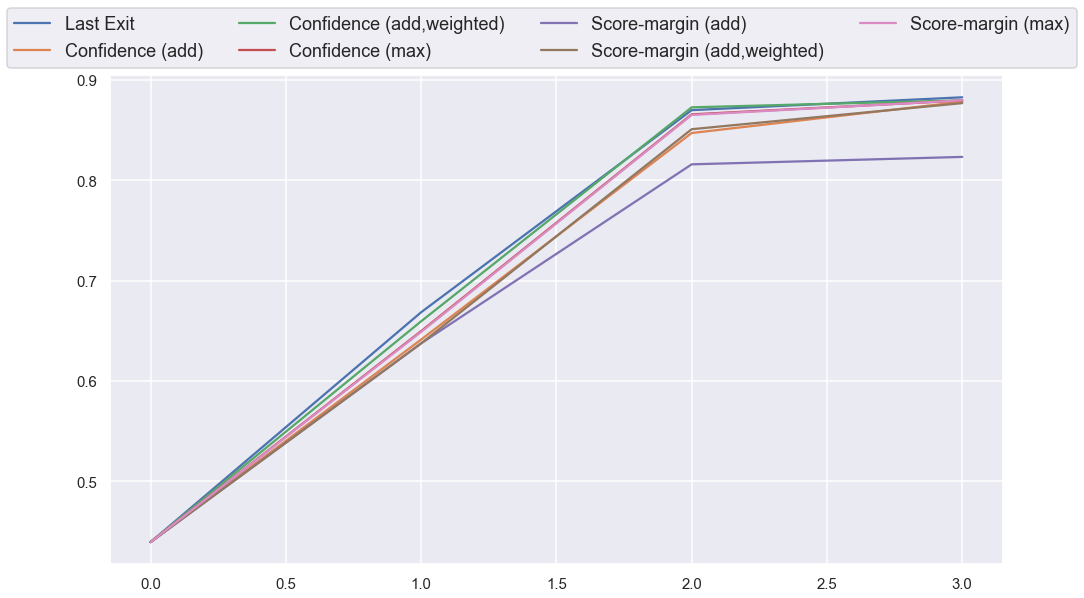

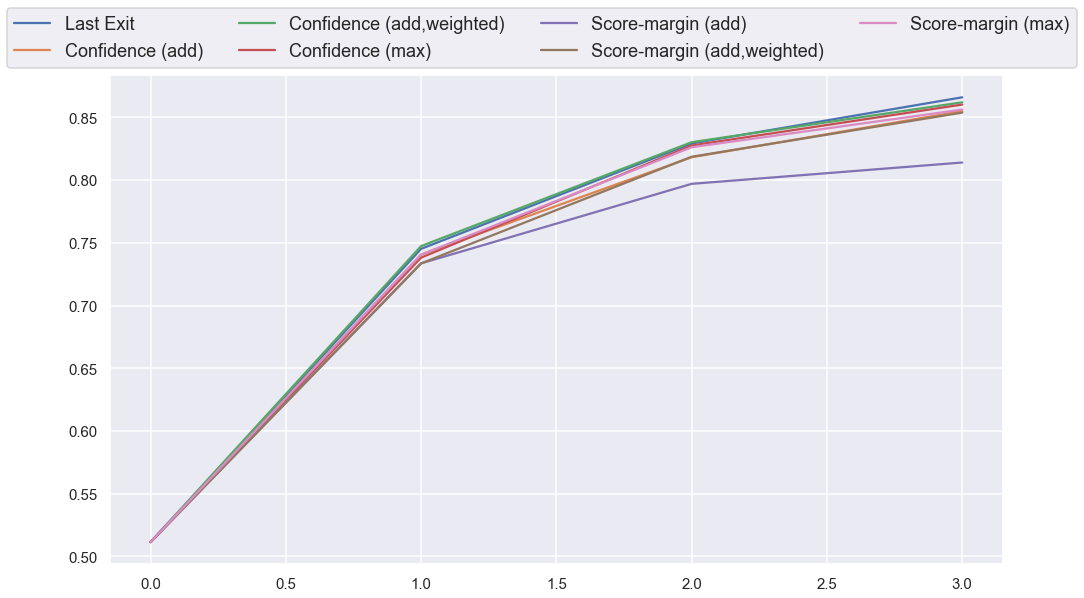

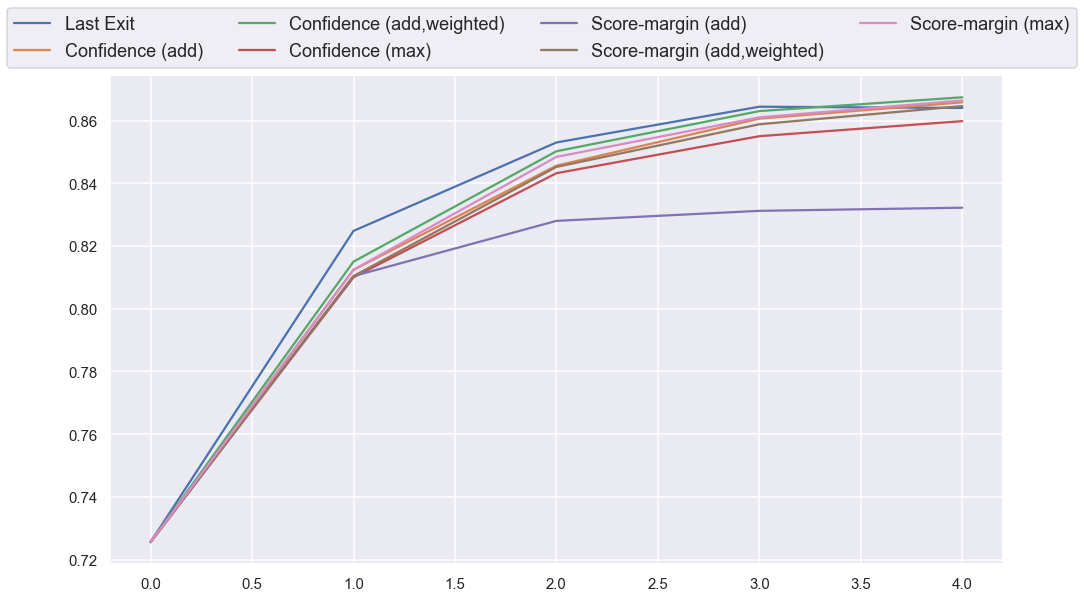

In [56]:
for net in lp:
    fig, axes = plt.subplots(1,1)
    for method in methods:
        axes.plot(lp[net][method])

    fig.legend(['Last Exit', 'Confidence (add)', 'Confidence (add,weighted)', 'Confidence (max)',
           'Score-margin (add)', 'Score-margin (add,weighted)', 'Score-margin (max)'], ncol=4, 
           loc="upper center", fontsize='medium')

IndexError: too many indices for array

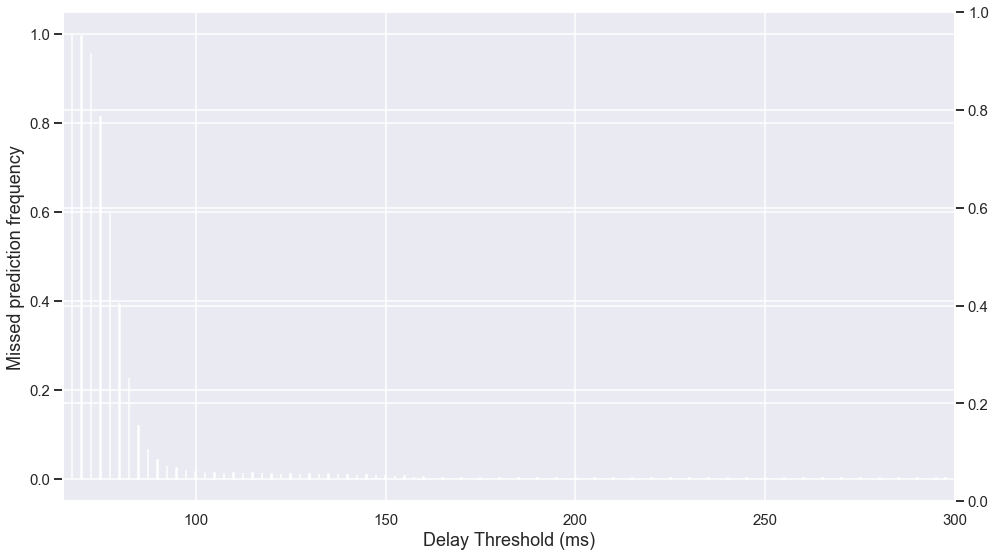

In [57]:
fig, axes = plt.subplots(1,1)

axes.bar(results['b-resnet']['Delay Threshold'], results['b-resnet']['missed'] / 5000, width=.2)
axes.set_xlim([65,300])
axes.set_ylim([-0.05,1.05])
axes.set(xlabel='Delay Threshold (ms)', ylabel='Missed prediction frequency')

ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis
results['b-resnet'] = results['b-resnet'].dropna()
exits = np.array(results['b-resnet']['Exit'].tolist())
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,0]/5000,  color=current_palette[1])
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,1]/5000,  color=current_palette[2])
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,2]/5000,  color=current_palette[3])
ax2.plot(results['b-resnet']['Delay Threshold'], exits[:,3]/5000,  color=current_palette[4])


ax2.set(ylabel='Arrived at exit frequency')


fig.legend(['Lost Samples'] + ['exit-{}'.format(x) for x in range(4)], ncol=5, loc="upper center", fontsize='medium')
plt.savefig('exit-reached.png')

In [64]:
results = {
    'b-resnet' : pd.read_json('../edge_test/nuc_2_jetson_b-resnet.json'),
    'b-densenet' : pd.read_json('../edge_test/nuc_2_jetson_b-densenet.json'),
    'msdnet' : pd.read_json('../edge_test/msdnet-local3.json')
}

In [65]:
top5  = { x : np.array(results[x].loc[(results[x]['index_top5'] != -1)].groupby('exit').count()['index_top5'].tolist()) / 5000 for x in results }
top5

{'b-resnet': array([0.738 , 0.8792, 0.9648, 0.9696]),
 'b-densenet': array([0.7862, 0.917 , 0.9452, 0.965 ]),
 'msdnet': array([0.9012, 0.9458, 0.9582, 0.963 , 0.9612])}

In [66]:
top1 = {x : np.array(results[x].loc[(results[x]['correct'] == True)].groupby('exit').count()['correct'].tolist()) / 5000 for x in results }
top1

{'b-resnet': array([0.4394, 0.6684, 0.8698, 0.8826]),
 'b-densenet': array([0.5114, 0.7452, 0.8292, 0.866 ]),
 'msdnet': array([0.7256, 0.8248, 0.853 , 0.8644, 0.864 ])}

In [67]:
combined_top5 = {}
for net in results:
    one_is_right = np.zeros(4)
    if net == 'msdnet':
        one_is_right = np.zeros(5)
    for _, d in results[net].groupby('sample'):
        idx = d.index_top5.tolist()
        for n in range(len(idx),0,-1):
            if all(i == -1 for i in idx[:n]):
                one_is_right[n-1] +=1 
    combined_top5[net] = (5000 - one_is_right) / 5000
combined_top5

{'b-resnet': array([0.738 , 0.8948, 0.9762, 0.9824]),
 'b-densenet': array([0.7862, 0.9344, 0.967 , 0.978 ]),
 'msdnet': array([0.9012, 0.9574, 0.9724, 0.978 , 0.9796])}

In [68]:
combined_top1 = {}
for net in results:
    one_is_right = np.zeros(4)
    if net == 'msdnet':
        one_is_right = np.zeros(5)
    for _, d in results[net].groupby('sample'):
        idx = d.index_top5.tolist()
        for n in range(len(idx),0,-1):
            if any(i==0 for i in idx[:n]):
                one_is_right[n-1] += 1
    combined_top1[net] = one_is_right / 5000
combined_top1

{'b-resnet': array([0.4394, 0.6962, 0.8968, 0.9152]),
 'b-densenet': array([0.5114, 0.7786, 0.8762, 0.9132]),
 'msdnet': array([0.7256, 0.8546, 0.8944, 0.9104, 0.9174])}

In [61]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox.expanded(1.05,1.4))

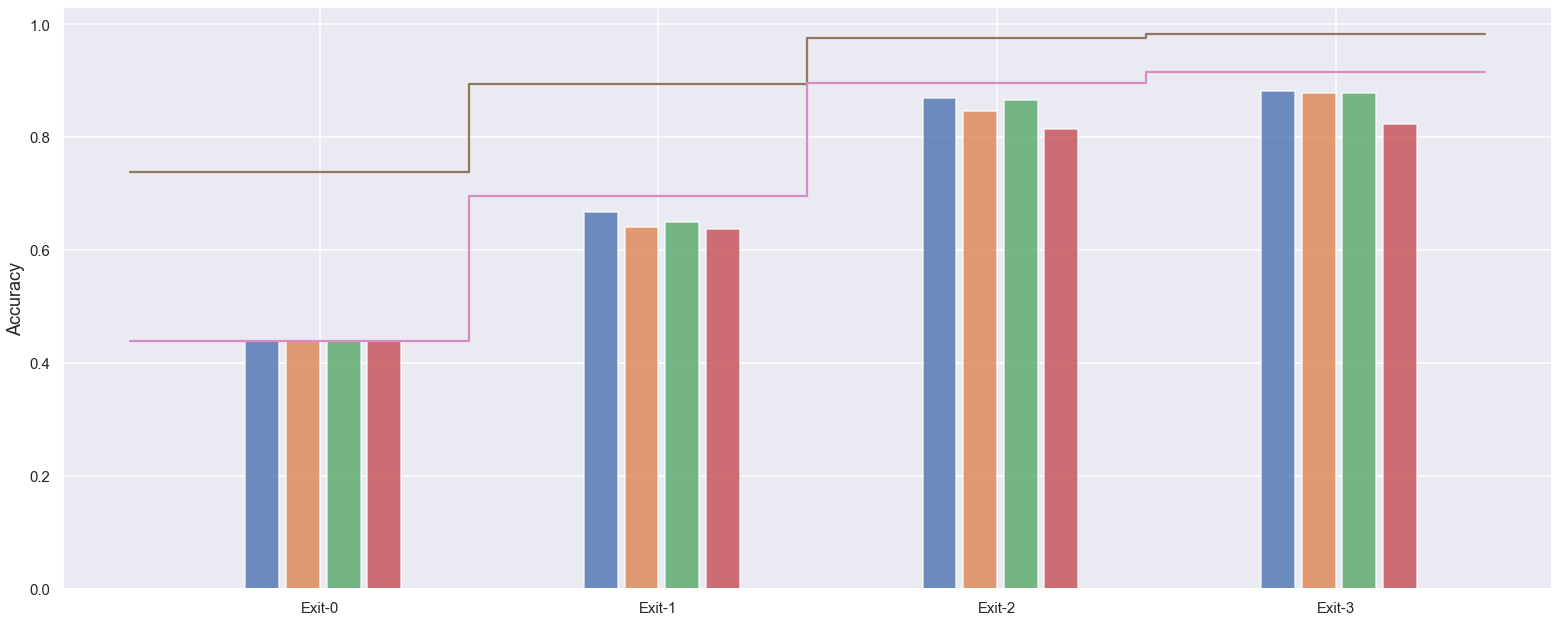

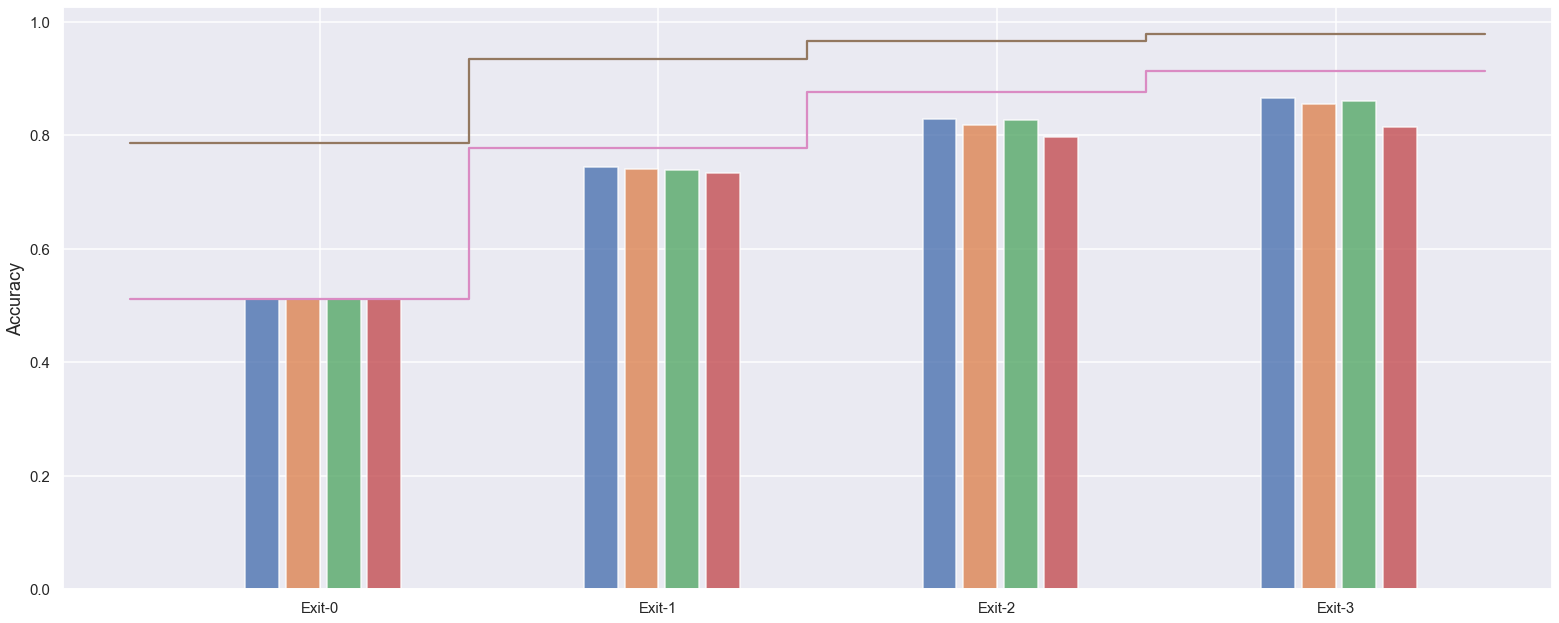

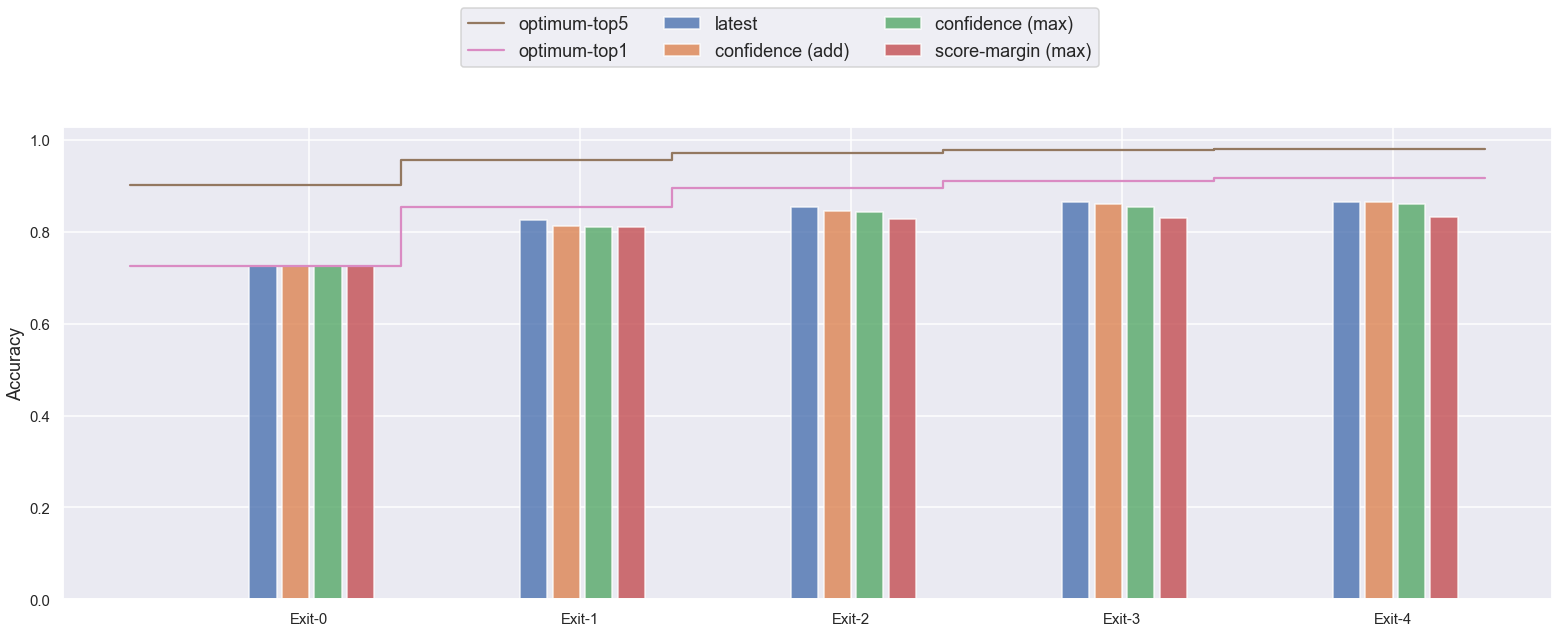

In [219]:
for net in lp:
    fig, axes = plt.subplots(1,1, figsize=(22,9))
    n=4
    if net == 'msdnet':
        n = 5
    x = np.arange(n)
    axes.step(np.arange(n+1)-(n+1+width)*width,np.insert(combined_top5[net],0, combined_top5[net][0]), color=current_palette[5])
    axes.step(np.arange(n+1)-(n+1+width)*width,np.insert(combined_top1[net],0, combined_top1[net][0]), color=current_palette[6])
    width = 0.10  
    for index_offset, method in zip(np.arange(-1.2,6,1.2), methods[:4]):
        axes.bar(x+width*index_offset, lp[net][method], width=width, alpha=0.8)

    axes.set_xticks(x + width / 2)
    

    axes.set_xticklabels('Exit-{}'.format(i) for i in x)
    axes.set(ylabel='Accuracy')
    fig.tight_layout()
    
    plt.savefig(net + '_theoretical_score_combinations.png')
fig.subplots_adjust(top=0.8)
legend = fig.legend(['optimum-top5', 'optimum-top1']+methods, ncol=3, 
               loc="upper center", fontsize='medium')

export_legend(legend, filename='theoretical_score_combination_legend.png')